# Assignment Stat 4 Solution

Problem Statement 1:
Is gender independent of education level? A random sample of 395 people were
surveyed and each person was asked to report the highest education level they
obtained. The data that resulted from the survey is summarized in the following table:

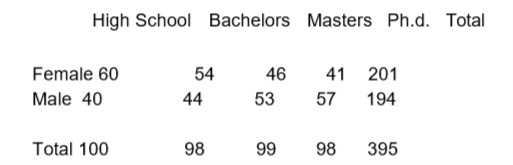

Question: Are gender and education level dependent at 5% level of significance? In other words, given the data collected above, is there a relationship between the gender of an individual and the level of education that they have obtained? 

#H0: there is a relationship between the gender of an individual and the level of education.
#H1: there is no relationship between the gender of an individual and the level of education.

In [2]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
import numpy as np
Observed_values = np.array([[60,54,46,41],[40,44,53,57]])
print("Observed Values :-\n",Observed_values)
Expected_values=stats.chi2_contingency(Observed_values)
print("Expected_values :-\n",Expected_values[3])
ddof=(len(Observed_values)-1)*(len(Observed_values)-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Observed Values :-
 [[60 54 46 41]
 [40 44 53 57]]
Expected_values :-
 [[50.88607595 49.86835443 50.37721519 49.86835443]
 [49.11392405 48.13164557 48.62278481 48.13164557]]
Degree of Freedom:- 1


In [4]:
from scipy.stats import chi2
chi_square=sum([((o-e)**2)/e for o,e in zip(Observed_values,Expected_values[3])])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 4.020562033091432


In [5]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [6]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.04494873219330553
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.04494873219330553


In [8]:
if chi_square_statistic>=critical_value:
    print("Reject H0,there is no relationship between the gender of an individual and the level of education..")
else:
    print("Accept H0,there is a relationship between the gender of an individual and the level of education.")
    
if p_value<=alpha:
    print("Reject H0,there is no relationship between the gender of an individual and the level of education.")
else:
    print("Accept H0,there is a relationship between the gender of an individual and the level of education.")

Reject H0,there is no relationship between the gender of an individual and the level of education..
Reject H0,there is no relationship between the gender of an individual and the level of education.


Annova One way

Problem Statement 2: 
 
Using the following data, perform a oneway analysis of variance using α=.05. Write up the results in APA format. 

[Group1: 51, 45, 33, 45, 67]  [Group2: 23, 43, 23, 43, 45]  [Group3: 56, 76, 74, 87, 56] 

In [34]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'Group1': [51, 45, 33, 45, 67],'Group2': [23, 43, 23, 43, 45],'Group3': [56, 76, 74, 87, 56]})
df

,Group1,Group2,Group3
0,51,23,56
1,45,43,76
2,33,23,74
3,45,43,87
4,67,45,56


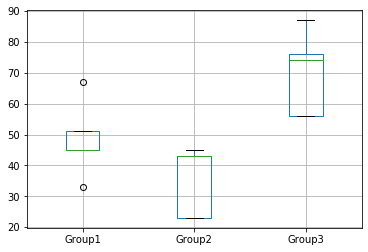

In [35]:
df.boxplot()

In [39]:
stacked = pd.DataFrame(df.stack()).reset_index()
stacked = stacked.rename({'level_1':'Groups',0:'Data'},axis=1)
stacked = stacked.drop('level_0', axis=1)
stacked = stacked.sort_values('Groups')
stacked

,Groups,Data
0,Group1,51
3,Group1,45
6,Group1,33
9,Group1,45
12,Group1,67
1,Group2,23
4,Group2,43
7,Group2,23
10,Group2,43
13,Group2,45


In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Data ~ Groups', data=stacked).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F   PR(>F)
Groups    3022.933333   2.0  9.747206  0.00306
Residual  1860.800000  12.0       NaN      NaN


Another way of doing the same problem

In [43]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'Group1': [51, 45, 33, 45, 67],'Group2': [23, 43, 23, 43, 45],'Group3': [56, 76, 74, 87, 56]})
df

,Group1,Group2,Group3
0,51,23,56
1,45,43,76
2,33,23,74
3,45,43,87
4,67,45,56


#calculating Sum squared within

In [51]:
SSW = 0
for col in df.columns:
    SSW = SSW + ((df[col] - df[col].mean())**2).sum()
print(SSW)    

1860.8


#calculating sum squared total

In [62]:
stacked = pd.DataFrame(df.stack()).reset_index()
stacked = stacked.rename({'level_1':'Groups',0:'Data'},axis=1)
stacked = stacked.drop('level_0', axis=1)
stacked = stacked.sort_values('Groups')
stacked

,Groups,Data
0,Group1,51
3,Group1,45
6,Group1,33
9,Group1,45
12,Group1,67
1,Group2,23
4,Group2,43
7,Group2,23
10,Group2,43
13,Group2,45


In [63]:
SST = ((stacked.Data - stacked.Data.mean())**2).sum()
SST

4883.733333333333

calculating sum squared between SSB
SSB  = SST - SSW

In [64]:
SSB = SST - SSW
SSB

3022.9333333333325

In [69]:
# SSB/ DF here Degrees of freedom -- DF is the number independant features or groups -1: 3-1=2
MSbetween  = SSB/2
MSbetween

1511.4666666666662

In [70]:
# SSW/ DF here Degrees of freedom -- DF is the number independant features or groups -1: 15-3=12
MSwithin = SSW/12
MSwithin

155.06666666666666

In [71]:
F = MSbetween/MSwithin
F

9.747205503009456

In [ ]:
#Looking in the F table F(2,12)
critical value  = 3.89

In [72]:
#We can reject the H0. We can conclude that the difference in means of the groups are statistically significant

Problem Statement 3: 
 
Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25. 
 
For 10, 20, 30, 40, 50: 

In [73]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'Group1': [10, 20, 30, 40, 50],'Group2': [5,10,15, 20, 25]})
df

,Group1,Group2
0,10,5
1,20,10
2,30,15
3,40,20
4,50,25


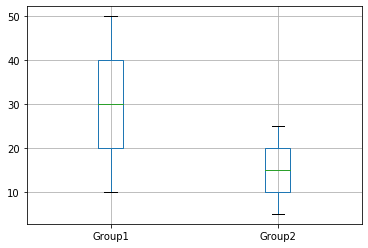

In [74]:
df.boxplot()

In [75]:
stacked = pd.DataFrame(df.stack()).reset_index()
stacked = stacked.rename({'level_1':'Groups',0:'Data'},axis=1)
stacked = stacked.drop('level_0', axis=1)
stacked = stacked.sort_values('Groups')
stacked

,Groups,Data
0,Group1,10
2,Group1,20
4,Group1,30
6,Group1,40
8,Group1,50
1,Group2,5
3,Group2,10
5,Group2,15
7,Group2,20
9,Group2,25


In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Data ~ Groups', data=stacked).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

          sum_sq   df    F   PR(>F)
Groups     562.5  1.0  3.6  0.09435
Residual  1250.0  8.0  NaN      NaN
